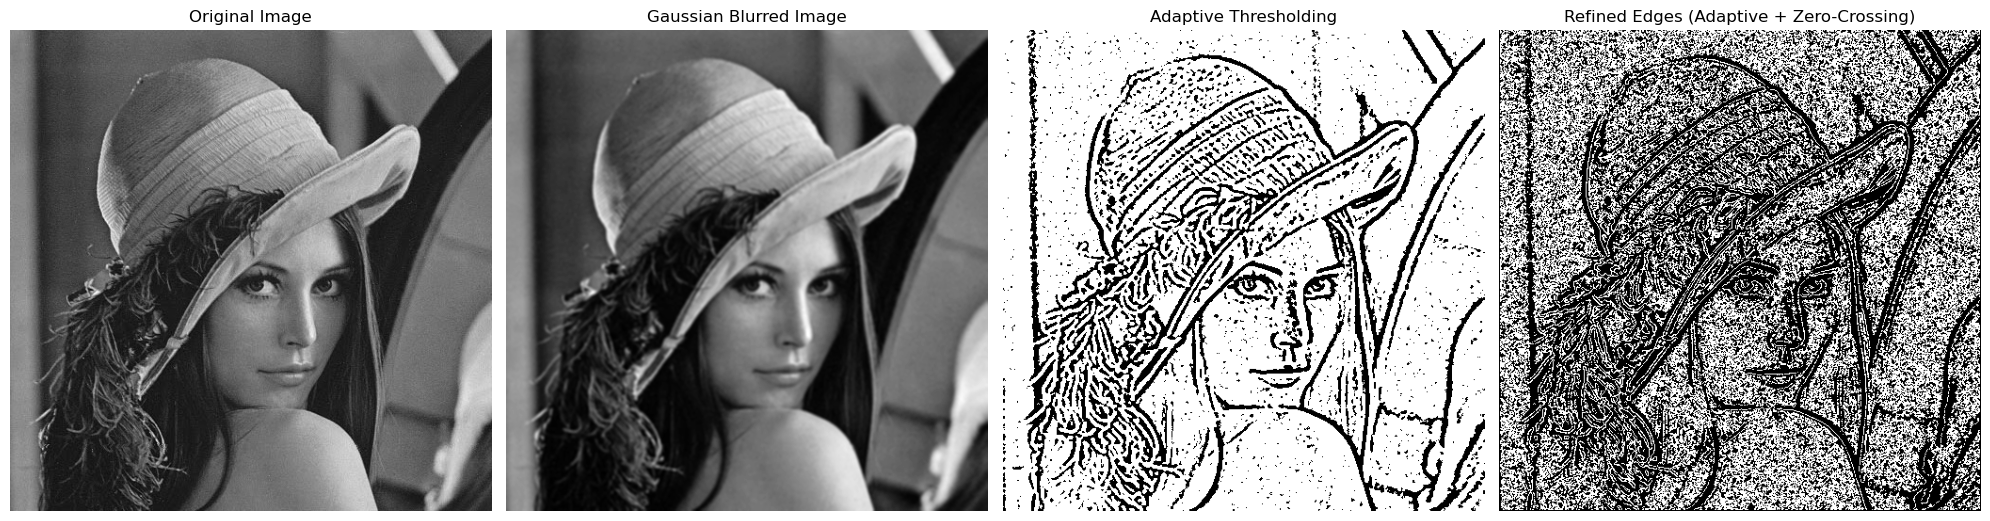

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Path to the image
image_path = os.path.join(os.getcwd(), 'data', 'images', 'lena_color.jpg')

# Load the image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Image could not be loaded.")
else:
    # Apply Gaussian Blur to smooth the image
    blurred_image = cv2.GaussianBlur(image, (5, 5), sigmaX=1.4)

    # Apply Adaptive Thresholding
    adaptive_thresh = cv2.adaptiveThreshold(
        blurred_image, 255, 
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
        cv2.THRESH_BINARY, 
        11, 2  # Block size and constant C
    )

    # Apply Laplacian Filter
    laplacian_filtered = cv2.Laplacian(blurred_image, cv2.CV_64F)

    # Zero-Crossing Detection
    zero_crossing = np.zeros_like(laplacian_filtered, dtype=np.uint8)
    rows, cols = laplacian_filtered.shape
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            if (laplacian_filtered[i, j] > 0 and
                ((laplacian_filtered[i - 1, j] < 0) or
                 (laplacian_filtered[i + 1, j] < 0) or
                 (laplacian_filtered[i, j - 1] < 0) or
                 (laplacian_filtered[i, j + 1] < 0))) or \
               (laplacian_filtered[i, j] < 0 and
                ((laplacian_filtered[i - 1, j] > 0) or
                 (laplacian_filtered[i + 1, j] > 0) or
                 (laplacian_filtered[i, j - 1] > 0) or
                 (laplacian_filtered[i, j + 1] > 0))):
                zero_crossing[i, j] = 255

    # Combine Adaptive Thresholding and Zero-Crossing
    final_edges = cv2.bitwise_and(adaptive_thresh, zero_crossing)

    # Plot the results
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 4, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 4, 2)
    plt.imshow(blurred_image, cmap='gray')
    plt.title("Gaussian Blurred Image")
    plt.axis("off")

    plt.subplot(1, 4, 3)
    plt.imshow(adaptive_thresh, cmap='gray')
    plt.title("Adaptive Thresholding")
    plt.axis("off")

    plt.subplot(1, 4, 4)
    plt.imshow(final_edges, cmap='gray')
    plt.title("Refined Edges (Adaptive + Zero-Crossing)")
    plt.axis("off")

    plt.tight_layout()
    plt.show()
